<a href="https://colab.research.google.com/github/Abhishek709mis/Hotel-Booking-Analysis/blob/main/Hotel_Booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**
--
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

# **Explore and analyze the data to discover important factors that govern the bookings.**

In [ ]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Read
hoteldata_df = pd.read_csv("/content/drive/MyDrive/alma_better_project1/Hotel Bookings.csv")

In [ ]:
 # Looking into the data
hoteldata_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# details 
hoteldata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hoteldata_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We can see that there are 32 columns in the dataframe. 
**Some columns like 'children', 'company', 'babies have null values.**

In [ ]:
# Creating a copy of dataframe
dataf1 = hoteldata_df.copy()

In [ ]:
dataf1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
dataf1['is_canceled'].unique()

array([0, 1])

In [ ]:
dataf1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
dataf1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
dataf1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
dataf1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In this we see that array has 0 adn null value both.

# **Cleaning data**

**Cleaning data we will perform following steps:** 


*   Remove duplicate rows
*   Handling missing values. 
*   Convert columns to appropriate datatypes
*   Adding impoertant columns





 **Removing duplicate rows**

In [ ]:
# Show no. of rows of duplicate rows duplicate rows
dataf1[dataf1.duplicated()].shape

(31994, 32)

In [ ]:
# Dropping duplicate values
dataf1.drop_duplicates(inplace = True)

In [ ]:
dataf1.shape

(87396, 32)

**Handling missing values**

In [ ]:
# Columns having missing values.
dataf1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

In [ ]:
dataf1[['company','agent']] = dataf1[['company','agent']].fillna(0)

In [ ]:
dataf1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

Children has 0 value which means 0 children were present in group of customers who made that transaction.

'NAN' values are the missing values.

In [ ]:
dataf1['children'].fillna(dataf1['children'].mean(), inplace = True)

In [ ]:
dataf1['country'].fillna('others', inplace = True)

In [ ]:
# Checking if all null values are removed
dataf1.isnull().sum().sort_values(ascending = False)[:6]

company                      167
agent                        167
hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
dtype: int64

In [ ]:
dataf1[dataf1['adults']+dataf1['babies']+dataf1['children'] == 0].shape

(166, 32)

In [ ]:
dataf1.drop(dataf1[dataf1['adults']+dataf1['babies']+dataf1['children'] == 0].index, inplace = True)

**Converting columns to appropriate datatypes.**

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
dataf1[['children', 'company', 'agent']] = dataf1[['children', 'company', 'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
dataf1['reservation_status_date'] = pd.to_datetime(dataf1['reservation_status_date'], format = '%Y-%m-%d')

**Adding important columns.**

In [ ]:
# Adding total staying days in hotels
dataf1['total_stay'] = dataf1['stays_in_weekend_nights']+dataf1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
dataf1['total_people'] = dataf1['adults']+dataf1['children']+dataf1['babies']

# EDA

Lets first find the correlation between the numerical data.

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns

In [ ]:
new_df1 = dataf1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','reservation_status_date','total_stay','total_people']]

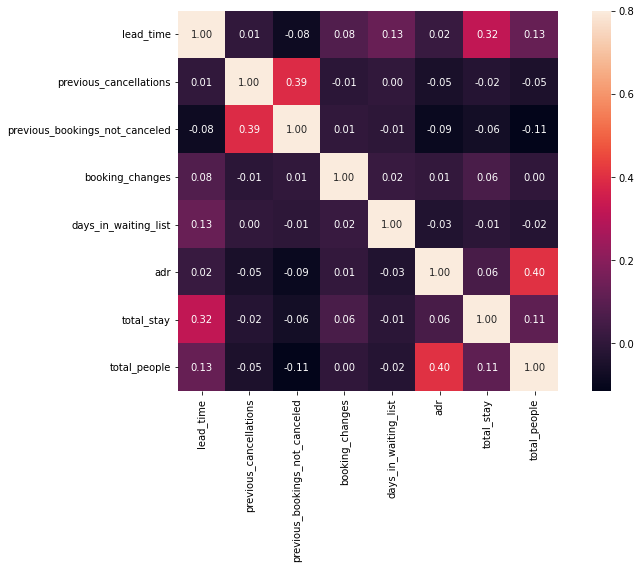

In [ ]:
#correlation matrix
corrmat = new_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

Total stay length and lead time have slight correlation.

This may means that for longer hotel stays people generally plan little before the the actual arrival.

adr correlated with total_people, which makes sense as more no. of people means more revenue.



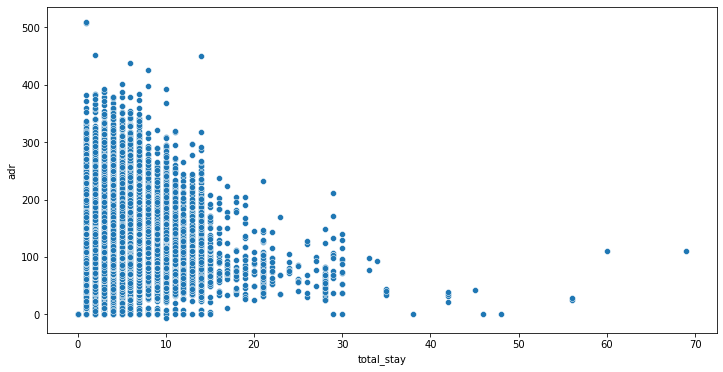

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = dataf1)
plt.show()

In [ ]:
dataf1.drop(dataf1[dataf1['adr'] > 5000].index, inplace = True)

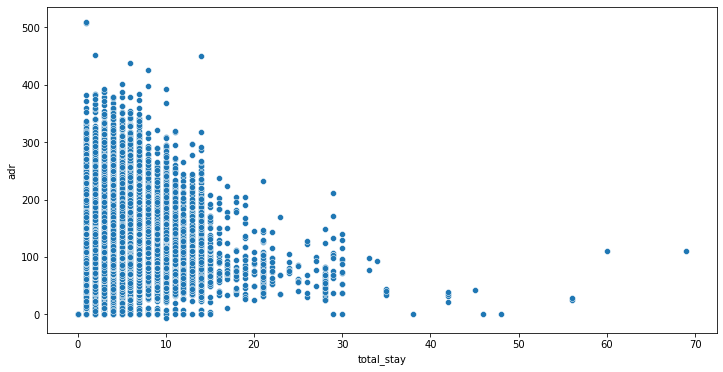

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = dataf1)
plt.show()

From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

# Univariate Analysis

Q1) Which agent makes most no. of bookings?

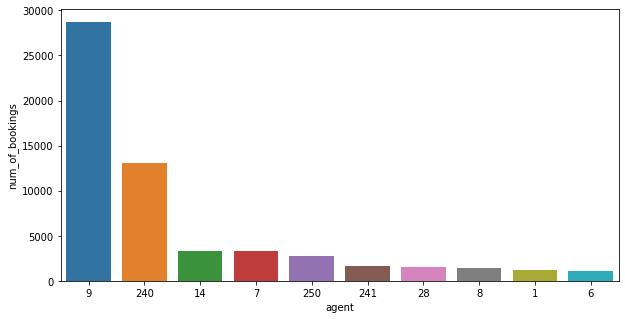

In [ ]:
databook1 = pd.DataFrame(dataf1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
databook1.drop(databook1[databook1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = databook1[:10]                                                                  # Selecting from  top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

Q2) Which room type is in most demand and which room type generates highest adr?

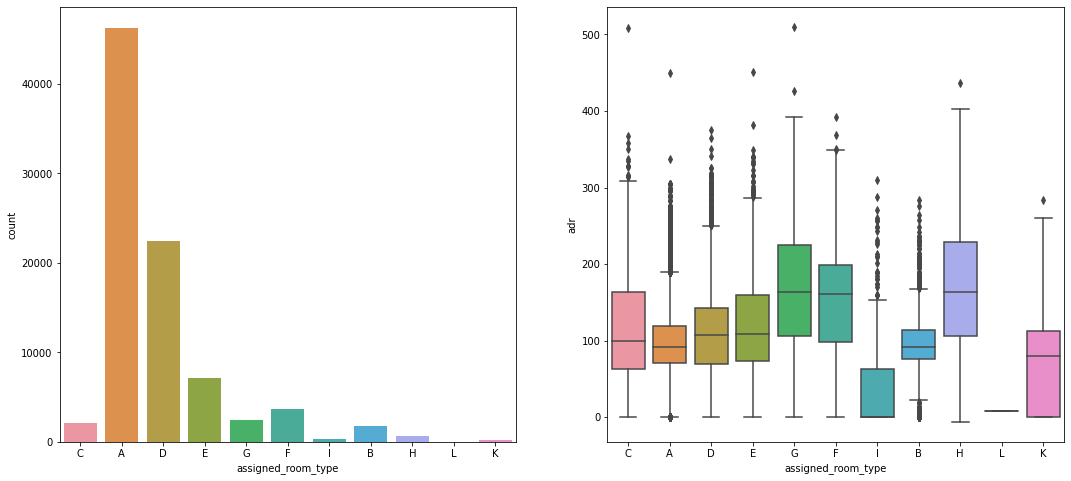

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
grp_by_room = dataf1.groupby('assigned_room_type')
databook1['Num_of_bookings'] = grp_by_room.size()
sns.countplot(ax = axes[0], x = dataf1['assigned_room_type'])
sns.boxplot(ax = axes[1], x = dataf1['assigned_room_type'], y = dataf1['adr'])
plt.show()

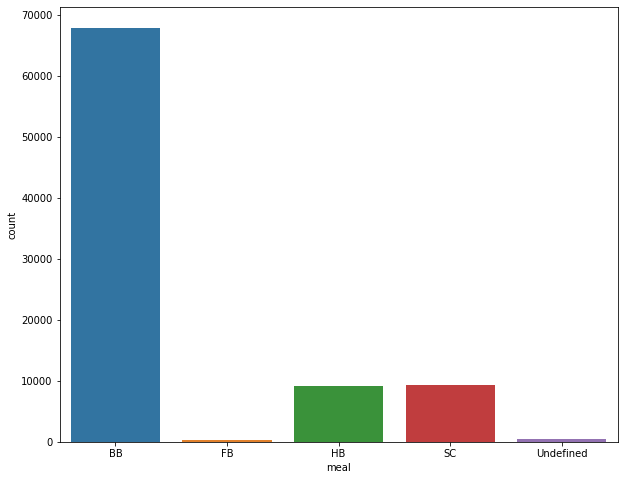

In [ ]:
plt.figure( figsize=(10, 8))
sns.countplot(x = dataf1['meal'])
plt.show()

Most preferred meal type is Bed and breakfast(BB).

##  Hotel wise analysis

Q1) What is percentage of bookings in each hotel?

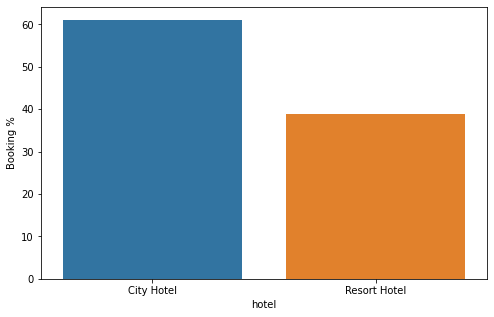

In [ ]:
grouped_by_hotel = dataf1.groupby('hotel')
hotel1 = pd.DataFrame((grouped_by_hotel.size()/dataf1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = hotel1['hotel'], y = hotel1['Booking %'] )
plt.show()

60% bookings are for City hotel 

40% bookings are for Resort hotel.

Q2) Which hotel seems to make more revenue?

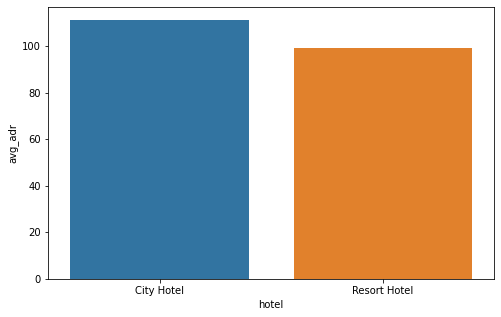

In [ ]:
hotelrevenu = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = hotelrevenu['hotel'], y = hotelrevenu['avg_adr'] )
plt.show()

City hotel seems to be making slightly more revenue.

Q3) Which hotel has higher lead time?

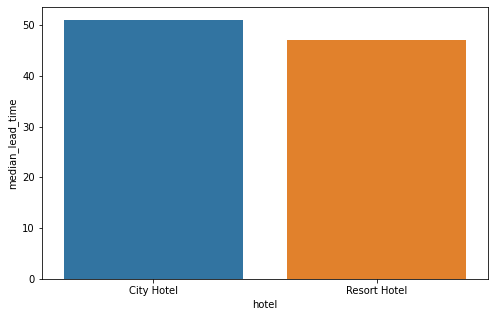

In [ ]:
highertime = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = highertime['hotel'], y = highertime['median_lead_time'] )
plt.show()

City hotel has slightly higher median lead time.

Q4) What is preferred stay length in each hotel?

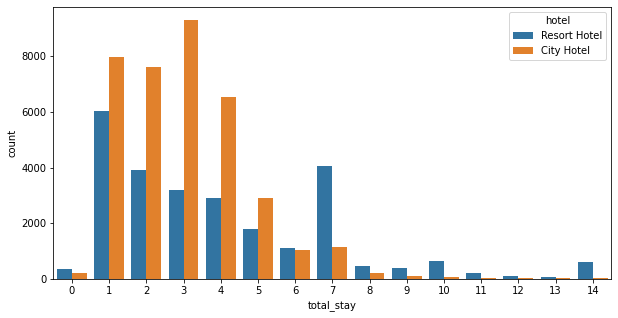

In [ ]:
staylong = dataf1[dataf1['is_canceled'] == 0]
s1 = staylong[staylong['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

People prefer City hotel for short stay, 

and for long stays,

Resort Hotel is preferred.

Q5) Which hotel has longer waiting time?

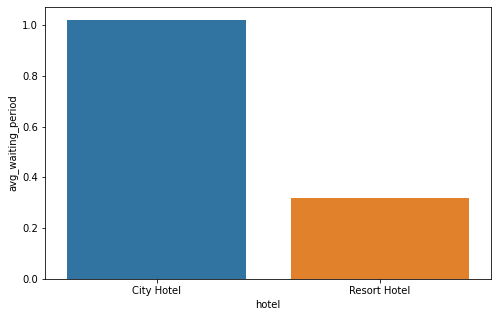

In [ ]:
longer = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = longer['hotel'], y = longer['avg_waiting_period'] )
plt.show()

# Distribution Channel wise Analysis

Q1) Which is the most common channel for booking hotels?

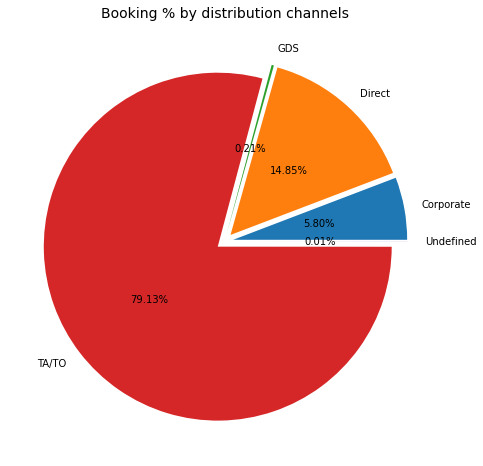

In [ ]:
hotelch= dataf1.groupby('distribution_channel')
d1 = pd.DataFrame(round((hotelch.size()/dataf1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

Q2) Which distribution channel brings better revenue generating deals for hotels?

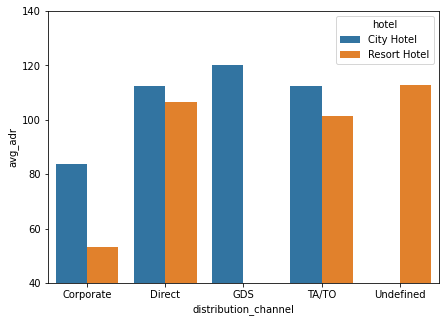

In [ ]:
hoteldistribution = dataf1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((hoteldistribution['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO.


Resort hotel has more revnue generating deals by direct and TA/TO channel. 

Q2) Which channel is mostly used for early booking of hotels?

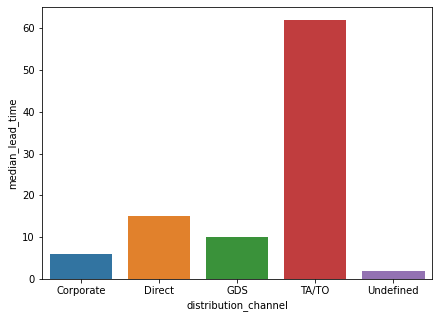

In [ ]:
booking  = dataf1.groupby('distribution_channel')
d2 = pd.DataFrame(round(booking['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

# Booking cancellation Analysis

Q1) Which significant distribution channel has highest cancellation percentage?

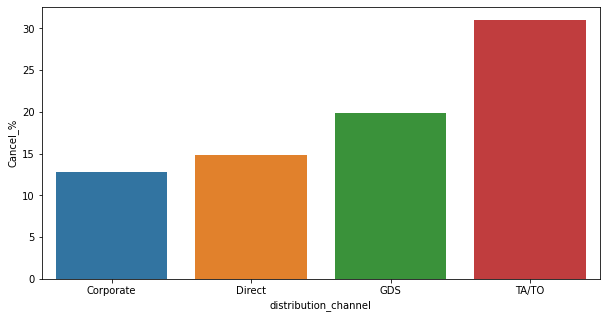

In [ ]:
d1 = pd.DataFrame((hotelch['is_canceled'].sum()/hotelch.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

Lead time causes the cancellation of booking.

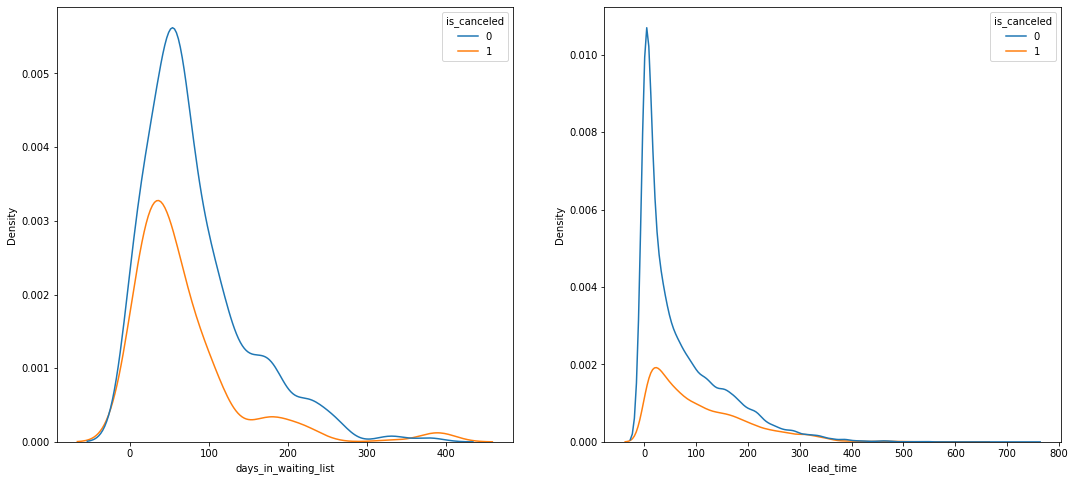

In [ ]:
cancellation_booking = dataf1[dataf1['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = cancellation_booking)
sns.kdeplot(ax = axes[1], x = dataf1['lead_time'], hue = dataf1['is_canceled'])
plt.show()

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.

Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.